In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

c:\users\shubh\anaconda3\envs\dev\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shubh\anaconda3\envs\dev\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shubh\anaconda3\envs\dev\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\shubh\anaconda3\envs\dev\lib\site-packages\tensorflow\python\framework

In [2]:
df=pd.read_csv('Chest_xray_Corona_Metadata.csv')

In [3]:
df.tail()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus
5909,5932,person1632_virus_2827.jpeg,Pnemonia,TEST,NaN,Virus


In [4]:
train_img_path='Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'
test_img_path='Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/'

In [27]:
im=cv2.imread(train_img_path+df.loc[981][1],0)
im_res=cv2.resize(im, (400, 400)) 
im_res.shape

(400, 400)

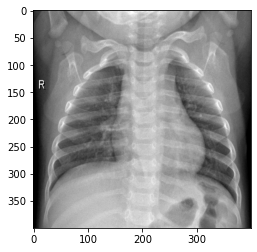

In [28]:
plt.imshow(im_res, cmap='gray')
plt.show()

In [7]:
a=img_to_array(im_res)

In [42]:
def preprocessimage(path):
    temp_img=image.load_img(path,target_size=(224,224,3))
    return temp_img

In [43]:
img_n=preprocessimage(train_img_path+df.loc[981][1])

NameError: name 'image' is not defined

In [37]:
a.shape

(1036, 1276, 1)

In [17]:
df_test.Dataset_type.value_counts()

TEST    624
Name: Dataset_type, dtype: int64

In [33]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df.Label.values)

In [5]:
df_train=df[df['Dataset_type'] == 'TRAIN']

In [35]:
df_train=df_train.sample(frac=1).reset_index(drop=True)

In [36]:
df_train.reset_index(inplace=True,drop=True)

In [37]:
df_train.head(50)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,2997,person23_bacteria_91.jpeg,1,TRAIN,NaN,bacteria
1,3492,person363_bacteria_1655.jpeg,1,TRAIN,NaN,bacteria
2,1331,NORMAL2-IM-1342-0001.jpeg,0,TRAIN,NaN,NaN
3,2784,person1649_bacteria_4377.jpeg,1,TRAIN,NaN,bacteria
4,1962,person1320_bacteria_3345.jpeg,1,TRAIN,NaN,bacteria
5,5292,1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg,1,TRAIN,COVID-19,Virus
6,2157,person1411_bacteria_3604.jpeg,1,TRAIN,NaN,bacteria
7,573,IM-0709-0001.jpeg,0,TRAIN,NaN,NaN
8,2796,person1644_bacteria_4356.jpeg,1,TRAIN,NaN,bacteria
9,3439,person374_bacteria_1712.jpeg,1,TRAIN,NaN,bacteria


In [5]:
df_test=df[df['Dataset_type'] == 'TEST']

In [10]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(400,400,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 16)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 396, 396, 32)      4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 396, 396, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 194, 194, 32)      18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 194, 194, 32)    

In [11]:
images=[]
for i in range(len(df_train[:50])):
    im=cv2.imread(train_img_path+df_train.loc[i][1],0)
    im_res=cv2.resize(im, (400, 400))
    a=img_to_array(im_res)
    a = a/255.0
    images.append(a)
   #img_arr=np.append(img_arr,[a])

In [22]:
im=cv2.imread(test_img_path+df_test.loc[0][1],0)
im_res=cv2.resize(im, (64, 64))
a=img_to_array(im_res)
a = a/255.0
a.shape

KeyError: 0

In [40]:
images[1].shape

(400, 400, 1)

In [41]:
len(images)

10

In [12]:
x_train=np.array(images)

In [13]:
x_train.shape

(50, 400, 400, 1)

In [44]:
img_arr=np.array

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
y_train=df_train[:50]['Label']

In [16]:
from keras.utils import np_utils
y_cate=np_utils.to_categorical(y_train)

In [17]:
y_cate.shape

(50, 2)

In [18]:
hist = model.fit(x_train,y_cate, epochs=20, shuffle=True, batch_size=10, validation_split=0.20)


Train on 40 samples, validate on 10 samples
Epoch 1/20


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[metrics/accuracy/Identity/_159]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [82]:
!pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 1.8.0
Summary: TensorFlow helps the tensors flow
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: c:\users\shubh\anaconda3\envs\dev\lib\site-packages
Requires: numpy, grpcio, termcolor, protobuf, wheel, six, tensorboard, gast, astor, absl-py
Required-by: 


In [6]:
from tensorflow.keras.models import load_model

In [7]:
loaded_model = load_model("./conv.h5")

In [8]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)       

In [14]:
import keras
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [15]:
loaded_model.predict(pred)

FailedPreconditionError: 2 root error(s) found.
  (0) Failed precondition: Error while reading resource variable conv2d_3/kernel from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/conv2d_3/kernel/class tensorflow::Var does not exist.
	 [[{{node conv2d_3/Conv2D/ReadVariableOp}}]]
	 [[dense_2/Softmax/_13]]
  (1) Failed precondition: Error while reading resource variable conv2d_3/kernel from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/conv2d_3/kernel/class tensorflow::Var does not exist.
	 [[{{node conv2d_3/Conv2D/ReadVariableOp}}]]
0 successful operations.
0 derived errors ignored.

In [9]:
l=[]
im=cv2.imread(test_img_path+df_test.iloc[0,1],0)
im_res=cv2.resize(im, (64, 64))
a=img_to_array(im_res)
a = a/255.0
l.append(a)


In [10]:
df_test.iloc[0,1]

'IM-0021-0001.jpeg'

In [11]:
pred=np.array(l)

In [10]:
df_train.Label_1_Virus_category.value_counts()

bacteria          2535
Virus             1407
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

In [12]:
df_label1=df_train[(df_train['Label_1_Virus_category'] == 'Virus') or (df_train['Label_1_Virus_category'] == 'bacteria')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [18]:
df_Labell1=df_train[(df_train.Label_1_Virus_category == 'Virus') | (df.Label_1_Virus_category == 'bacteria')]

c:\users\shubh\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [19]:
df_Labell1.shape

(3942, 6)